In [159]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 1.1

Read in all data sets and inspect their basic properties.


In [160]:
ATHLETES_PATH = "../data/athletes.csv"
GAMES_PATH = "../data/games.csv"
RESULTS_PATH = "../data/results.xlsx"

In [161]:
athletes_df = pd.read_csv(ATHLETES_PATH)
games_df = pd.read_csv(GAMES_PATH,sep=";")

xls = pd.ExcelFile(RESULTS_PATH)


In [162]:
xls.sheet_names

['Year 2002', 'Year 2004', 'Year 2006', 'Year 2008', 'Year 2010', 'Year 2012']

In [163]:
results_dfs = {}
results_dataframe = pd.DataFrame()


for sheet_name in xls.sheet_names:
    results_dfs[sheet_name] = pd.read_excel(RESULTS_PATH, sheet_name=sheet_name)
    results_dfs[sheet_name].columns = results_dfs[sheet_name].iloc[0]
    results_dfs[sheet_name] = results_dfs[sheet_name].drop(0).reset_index(drop=True)
    # dataframes.append(df)
    print(sheet_name)
    results_dataframe = pd.concat([results_dataframe, results_dfs[sheet_name]], axis=0, ignore_index=True)
    results_dataframe.shape

print(results_dataframe.head())

Year 2002
Year 2004
Year 2006
Year 2008
Year 2010
Year 2012
0 athlete_id  season          sport                event position   medal  \
0      13065  winter      Bobsleigh           Two, Women        7     NaN   
1      13139  winter  Speed Skating  3,000 metres, Women       10     NaN   
2      13139  winter  Speed Skating  5,000 metres, Women        3  Bronze   
3      68826  winter      Bobsleigh             Two, Men       10     NaN   
4      69119  winter      Bobsleigh            Four, Men       14     NaN   

0        country country_code                  team  
0          Italy          ITA  Gerda Weissensteiner  
1         Canada          CAN                   NaN  
2         Canada          CAN                   NaN  
3  Great Britain          GBR          Lee Johnston  
4  Great Britain          GBR       Great Britain 2  


In [164]:
results_dataframe.head()

,athlete_id,season,sport,event,position,medal,country,country_code,team
0,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner
1,13139,winter,Speed Skating,"3,000 metres, Women",10,NaN,Canada,CAN,NaN
2,13139,winter,Speed Skating,"5,000 metres, Women",3,Bronze,Canada,CAN,NaN
3,68826,winter,Bobsleigh,"Two, Men",10,NaN,Great Britain,GBR,Lee Johnston
4,69119,winter,Bobsleigh,"Four, Men",14,NaN,Great Britain,GBR,Great Britain 2


In [165]:
results_dataframe['athlete_id'] = results_dataframe['athlete_id'].astype(int)

In [166]:
# print(results_dataframe.shape)
# results_dataframe.columns = results_dataframe.iloc[0]
# results_dataframe = results_dataframe[1:]
# results_dataframe.head()

In [167]:
results_dataframe.head()

,athlete_id,season,sport,event,position,medal,country,country_code,team
0,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner
1,13139,winter,Speed Skating,"3,000 metres, Women",10,NaN,Canada,CAN,NaN
2,13139,winter,Speed Skating,"5,000 metres, Women",3,Bronze,Canada,CAN,NaN
3,68826,winter,Bobsleigh,"Two, Men",10,NaN,Great Britain,GBR,Lee Johnston
4,69119,winter,Bobsleigh,"Four, Men",14,NaN,Great Britain,GBR,Great Britain 2


##### Games Dataset Exploration


In [171]:
games_df.shape

(62, 6)

In [172]:
games_df.head()

,year,season,city,country,opened,closed
0,1912,summer,Stockholm,Sweden,1912-07-06,1912-07-27
1,1920,summer,Antwerpen,Belgium,1920-08-14,1920-08-30
2,1996,summer,Atlanta,United States,1996-07-19,1996-08-04
3,1924,summer,Paris,France,1924-07-05,1924-07-27
4,1992,summer,Barcelona,Spain,1992-07-25,1992-08-09


##### Atheletes Dataset Exploration


In [173]:
athletes_df.head()

,athlete_id,name,gender,measurements,born,died,affiliations
0,7.0,Patrick•Chila,male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...
1,15.0,Damien•Éloi,male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA..."
2,18.0,Jean-Philippe•Gatien,male,178 cm / 73 kg,1968-10-16,NaN,"Levallois SC, Levallois-Perret (FRA)"
3,27.0,Christophe•Legoût,male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ..."
4,35.0,Fabrice•Santoro,male,177 cm / 68 kg,1972-12-09,NaN,NaN


In [174]:
athletes_df.shape

(39375, 7)

In [175]:
athletes_df.isna().sum()


athlete_id          0
name                0
gender              0
measurements      378
born                2
died            39073
affiliations     9179
dtype: int64

In [176]:
# print(results_dataframe.shape)
# results_dataframe.columns = results_dataframe.iloc[0]
# results_dataframe = results_dataframe[1:]
# results_dataframe.head()
# results_dataframe['athlete_id'] = results_dataframe['athlete_id'].astype(int)

In [177]:
results_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52327 entries, 0 to 52326
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   athlete_id    52327 non-null  int64 
 1   season        52327 non-null  object
 2   sport         52327 non-null  object
 3   event         52327 non-null  object
 4   position      43156 non-null  object
 5   medal         7266 non-null   object
 6   country       52327 non-null  object
 7   country_code  52327 non-null  object
 8   team          20082 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


In [178]:

results_dataframe.isna().sum()

0
athlete_id          0
season              0
sport               0
event               0
position         9171
medal           45061
country             0
country_code        0
team            32245
dtype: int64

In [179]:
games_df.isna().sum()


year        0
season      0
city        0
country     0
opened     11
closed     13
dtype: int64

In [180]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39375 entries, 0 to 39374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   athlete_id    39375 non-null  float64
 1   name          39375 non-null  object 
 2   gender        39375 non-null  object 
 3   measurements  38997 non-null  object 
 4   born          39373 non-null  object 
 5   died          302 non-null    object 
 6   affiliations  30196 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.1+ MB


In [181]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     62 non-null     int64 
 1   season   62 non-null     object
 2   city     62 non-null     object
 3   country  62 non-null     object
 4   opened   51 non-null     object
 5   closed   49 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.0+ KB


In [182]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39375 entries, 0 to 39374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   athlete_id    39375 non-null  float64
 1   name          39375 non-null  object 
 2   gender        39375 non-null  object 
 3   measurements  38997 non-null  object 
 4   born          39373 non-null  object 
 5   died          302 non-null    object 
 6   affiliations  30196 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.1+ MB


In [183]:
results_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52327 entries, 0 to 52326
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   athlete_id    52327 non-null  int64 
 1   season        52327 non-null  object
 2   sport         52327 non-null  object
 3   event         52327 non-null  object
 4   position      43156 non-null  object
 5   medal         7266 non-null   object
 6   country       52327 non-null  object
 7   country_code  52327 non-null  object
 8   team          20082 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


In [184]:
results_dataframe.describe()

,athlete_id
count,52327.000000
mean,104900.739714
std,20489.342253
min,7.000000
25%,101408.000000
50%,108566.000000
75%,116513.500000
max,138429.000000


In [185]:
results_dataframe.shape

(52327, 9)

### Exercise 1.2

**Combine all provided data suitably into a single, tidy data set (e.g. by merging, concatenating or reshaping the data) such that you are able to answer the subsequent questions.**


In [186]:
results_athlethes = results_dataframe.merge(athletes_df, how="left", left_on="athlete_id", right_on="athlete_id")

In [187]:
results_athlethes.shape

(52327, 15)

In [188]:
results_athlethes.head()

,athlete_id,season,sport,event,position,medal,country,country_code,team,name,gender,measurements,born,died,affiliations
0,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner,Antonella•Bellutti,female,180 cm / 73 kg,1968-11-07,NaN,S.C. Adriana Bolzano/BC Cortina
1,13139,winter,Speed Skating,"3,000 metres, Women",10,NaN,Canada,CAN,NaN,Clara•Hughes,female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
2,13139,winter,Speed Skating,"5,000 metres, Women",3,Bronze,Canada,CAN,NaN,Clara•Hughes,female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...
3,68826,winter,Bobsleigh,"Two, Men",10,NaN,Great Britain,GBR,Lee Johnston,Marcus•Adam,male,182 cm / 82 kg,1968-02-28,NaN,"Belgrave Harriers, Wimbledon (GBR)"
4,69119,winter,Bobsleigh,"Four, Men",14,NaN,Great Britain,GBR,Great Britain 2,Phil•Harries,male,183 cm / 88 kg,1966-04-07,NaN,"Derby & County AC, Derby (GBR)"


In [217]:
results_athlethes.drop_duplicates(inplace=True)
results_athlethes.shape

(50680, 15)

In [190]:
results_with_games = results_athlethes.merge(games_df, how="left", on=["season","country"])

In [191]:
results_with_games.head()

,athlete_id,season,sport,event,position,medal,country,country_code,team,name,gender,measurements,born,died,affiliations,year,city,opened,closed
0,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner,Antonella•Bellutti,female,180 cm / 73 kg,1968-11-07,NaN,S.C. Adriana Bolzano/BC Cortina,2006.0,Torino,2006-02-10,2006-02-26
1,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner,Antonella•Bellutti,female,180 cm / 73 kg,1968-11-07,NaN,S.C. Adriana Bolzano/BC Cortina,1956.0,Cortina d'Ampezzo,1956-01-26,1956-02-05
2,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner,Antonella•Bellutti,female,180 cm / 73 kg,1968-11-07,NaN,S.C. Adriana Bolzano/BC Cortina,1944.0,Cortina d'Ampezzo,NaN,NaN
3,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner,Antonella•Bellutti,female,180 cm / 73 kg,1968-11-07,NaN,S.C. Adriana Bolzano/BC Cortina,2026.0,Milano-Cortina d'Ampezzo,NaN,NaN
4,13139,winter,Speed Skating,"3,000 metres, Women",10,NaN,Canada,CAN,NaN,Clara•Hughes,female,175 cm / 72 kg,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,1988.0,Calgary,1988-02-13,1988-02-28


In [192]:
results_with_games.drop_duplicates(inplace=True)
results_with_games.isna().sum()
# results_with_games.shape


athlete_id          0
season              0
sport               0
event               0
position        12322
medal           67965
country             0
country_code        0
team            48220
name               51
gender             51
measurements      349
born               53
died            81452
affiliations    11650
year            24964
city            24964
opened          37152
closed          40717
dtype: int64

In [193]:
results_with_games.shape

(81993, 19)

### Exercise 1.3

Describe and justify your data processing steps in a few sentences: How do you combine the data? What are the main challenges? How do you deal with these challenges and why?


**Data Processing Methodology**

1. First, I merged the results_dataframe with athletes_df using a left join on athlete_id
   This preserves all Olympic results while adding athlete details where available

2. Then merged the resulting dataframe with games_df using a left join on season and country
   This adds Olympic Games information like year, city, opening/closing dates

**Main challenges and solutions:**

1. Data quality issues: Many NA values in several columns (visible in isna().sum() outputs)
   Solution: Used left joins to preserve all result records even if athlete or games info missing
2. Data integration: Results data came from multiple Excel sheets
   Solution: Used pd.concat to combine all sheets into single results_dataframe
3. Different data formats: Excel sheets had headers as first row rather than column names
   Solution: Used iloc[0] to set column names and removed that row from the data
4. Inconsistent keys between dataframes: Had to identify common fields for merging
   Solution: Used season and country as join keys for games data as there was no direct ID field
   The final dataset contains complete Olympic results with athlete and games information


### Exercise 1.4

Sort the data permanently by year, sport, event and position. Then display the first 3 rows of the data set, and print the number of rows and columns.


In [194]:
results_with_games.sort_values(by=['year','sport','event','position'], inplace=True)

In [195]:
results_with_games.head(3)

,athlete_id,season,sport,event,position,medal,country,country_code,team,name,gender,measurements,born,died,affiliations,year,city,opened,closed
15472,102871,summer,Archery,"Individual, Men",29,NaN,Greece,GRE,NaN,Alexandros•Karageorgiou,male,172 cm / 58 kg,1986-06-03,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15
15468,102870,summer,Archery,"Individual, Men",54,NaN,Greece,GRE,NaN,Georgios•Kalogiannidis,male,180 cm / 73 kg,1982-11-21,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15
15476,102872,summer,Archery,"Individual, Men",57,NaN,Greece,GRE,NaN,Apostolos•Nanos,male,183 cm / 85 kg,1966-02-05,NaN,NaN,1896.0,Athina,1896-04-06,1896-04-15


In [196]:
results_with_games.shape

(81993, 19)

**Answer: Presented how it must be**

**My approuch**

- sort values function
- is shape (81993, 19)
  `


# Exercise 2


### Exercise 2.1

**Which lastname is the most common among the athletes of the 2012 olympic games, and how often does this name occur?**


In [197]:
df = results_with_games.copy()

In [198]:
df.head()

,athlete_id,season,sport,event,position,medal,country,country_code,team,name,gender,measurements,born,died,affiliations,year,city,opened,closed
15472,102871,summer,Archery,"Individual, Men",29,NaN,Greece,GRE,NaN,Alexandros•Karageorgiou,male,172 cm / 58 kg,1986-06-03,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15
15468,102870,summer,Archery,"Individual, Men",54,NaN,Greece,GRE,NaN,Georgios•Kalogiannidis,male,180 cm / 73 kg,1982-11-21,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15
15476,102872,summer,Archery,"Individual, Men",57,NaN,Greece,GRE,NaN,Apostolos•Nanos,male,183 cm / 85 kg,1966-02-05,NaN,NaN,1896.0,Athina,1896-04-06,1896-04-15
10175,80496,summer,Archery,"Individual, Women",7,NaN,Greece,GRE,NaN,Evangelia•Psarra,female,172 cm / 63 kg,1974-06-17,NaN,"Aristtotle University Alumni Archery Club, The...",1896.0,Athina,1896-04-06,1896-04-15
38188,102837,summer,Archery,"Individual, Women",11,NaN,Greece,GRE,NaN,Elpida•Romantzi,female,167 cm / 53 kg,1981-07-17,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15


In [199]:
df['Name'] = df['name'].str.split('•',n=1, expand=True)[0]
df['Surname'] = df['name'].str.split('•',n=1, expand=True)[1]
df.drop(columns=['name'], inplace=True)

In [200]:
df_2012 = df[df['year'] == 2012]
df_2012['Surname'].value_counts().head(10)


Surname
Smith       26
Thomas      12
Halsall     11
Murray      11
Jackson     11
Williams    10
Tweddle     10
Clark       10
Turner       8
Cook         8
Name: count, dtype: int64

**Answer: Most Common Surname for olympic games of 2012 is Smith and it occurs 26 times.**

**My approuch**

- I splitted name column to retrieve surname
- then I filter by date
- and finally count values to see number of their appearence


### Exercise 2.2

**Which woman won the Gold medal in the 100 meters race of the 2012 olympic games?**


In [201]:
df_2012['event']

15462                  Individual, Men
42476                  Individual, Men
38201                  Individual, Men
35316                  Individual, Men
62081                  Individual, Men
                     ...              
72972          Middle-Heavyweight, Men
72976                Middleweight, Men
38756              Middleweight, Women
81227    Lightweight, Freestyle, Women
25694     Middleweight, Freestyle, Men
Name: event, Length: 1444, dtype: object

In [202]:
print(df_2012['event'].unique())
len(df_2012['event'].unique())

['Individual, Men' 'Individual, Women' 'Team, Men' 'Team, Women'
 'Balance Beam, Women' 'Floor Exercise, Men' 'Floor Exercise, Women'
 'Horizontal Bar, Men' 'Horse Vault, Men' 'Horse Vault, Women'
 'Individual All-Around, Men' 'Individual All-Around, Women'
 'Parallel Bars, Men' 'Pommelled Horse, Men' 'Rings, Men'
 'Team All-Around, Men' 'Team All-Around, Women' 'Uneven Bars, Women'
 'Duet, Women' '1,500 metres, Men' '1,500 metres, Women'
 '10,000 metres, Men' '10,000 metres, Women' '100 metres Hurdles, Women'
 '100 metres, Men' '100 metres, Women' '110 metres Hurdles, Men'
 '20 kilometres Walk, Women' '200 metres, Men' '200 metres, Women'
 '3,000 metres Steeplechase, Men' '3,000 metres Steeplechase, Women'
 '4 × 100 metres Relay, Men' '4 × 100 metres Relay, Women'
 '4 × 400 metres Relay, Men' '4 × 400 metres Relay, Women'
 '400 metres Hurdles, Men' '400 metres Hurdles, Women' '400 metres, Men'
 '400 metres, Women' '5,000 metres, Men' '5,000 metres, Women'
 '50 kilometres Walk, Men' '8

242

In [203]:
df_2012['event']

15462                  Individual, Men
42476                  Individual, Men
38201                  Individual, Men
35316                  Individual, Men
62081                  Individual, Men
                     ...              
72972          Middle-Heavyweight, Men
72976                Middleweight, Men
38756              Middleweight, Women
81227    Lightweight, Freestyle, Women
25694     Middleweight, Freestyle, Men
Name: event, Length: 1444, dtype: object

In [204]:
df_2012[(df_2012['event'] == '100 metres, Women')]

,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,measurements,born,died,affiliations,year,city,opened,closed,Name,Surname
48250,114716,summer,Athletics,"100 metres, Women",6,NaN,Great Britain,GBR,NaN,female,163 cm / 60 kg,1983-03-20,NaN,"Woodford Green with Essex Ladies, Woodford (GBR)",2012.0,London,2012-07-27,2012-08-12,Jeannette,Kwakye
19218,104922,summer,Athletics,"100 metres, Women",NaN,NaN,Great Britain,GBR,NaN,female,165 cm / 55 kg,1979-12-30,NaN,"Shaftesbury Barnet Harriers, London (GBR)",2012.0,London,2012-07-27,2012-08-12,Abi,Oyepitan
48290,114742,summer,Athletics,"100 metres, Women",NaN,NaN,Great Britain,GBR,NaN,female,168 cm / 57 kg,1982-08-12,NaN,"Harrow AC, Harrow Weald (GBR)",2012.0,London,2012-07-27,2012-08-12,Laura,Turner
48298,114747,summer,Athletics,"100 metres, Women",NaN,NaN,Great Britain,GBR,NaN,female,175 cm / 67 kg,1986-01-24,NaN,"Blackheath & Bromley Harriers AC, Hayes (GBR)",2012.0,London,2012-07-27,2012-08-12,Montell,Douglas
81286,126945,summer,Athletics,"100 metres, Women",NaN,NaN,Great Britain,GBR,NaN,female,178 cm / 76 kg,1984-10-28,NaN,"Liverpool Harriers, Liverpool (GBR)",2012.0,London,2012-07-27,2012-08-12,Anyika,Onuora


In [205]:
df_2012[(df_2012['event'] == '100 metres, Women') & (df_2012['medal']=='Gold')]

,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,measurements,born,died,affiliations,year,city,opened,closed,Name,Surname


**Answer: Nobody got Gold Medal**

**My approuch**

- I checken event column and it unique values to see how data is saved its 242 unique value here
- then I try to filter out our required data point but I have found there is 6 cases of '100 metres, Women' but
- there is no gold medal winner in '100 metres, Women' :(


### Exercise 2.3

**Which athlete has won the largest number of gold medals (in all years covered by the dataset), considering only athletes from the following countries: “Jamaica”, “Trinidad and Tobago”, “Bar-bados”, “Grenada”, “Saint Kitts and Nevis”?**


In [206]:
df['country'].unique()

array(['Greece', 'France', 'United States', 'Great Britain', 'Sweden',
       'Germany', 'Belgium', 'Switzerland', 'Finland', 'Italy', 'Norway',
       'Australia', 'Austria', 'Japan', 'Mexico', 'Canada',
       'Republic of Korea', 'Spain', "People's Republic of China",
       'Russian Federation', 'Brazil', 'Croatia', 'Czech Republic',
       'Slovenia', 'Bulgaria', 'Argentina', 'Slovakia', 'Ukraine',
       'Andorra', 'Liechtenstein', 'Kazakhstan', 'Romania', 'Ireland',
       'South Africa', 'Bosnia and Herzegovina', 'Latvia', 'Iceland',
       'Poland', 'Chile', 'Monaco', 'Hungary', 'Lebanon',
       'Serbia and Montenegro', 'Tajikistan', 'Denmark', 'Algeria',
       'Georgia', 'Israel', 'Cyprus', 'Albania',
       'Islamic Republic of Iran', 'Madagascar', 'Kyrgyzstan',
       'Republic of Moldova', 'New Zealand', 'North Macedonia', 'Fiji',
       'San Marino', 'Lithuania', 'Montenegro', 'Estonia', 'Peru',
       'Cayman Islands', 'Azerbaijan', 'Senegal', 'Morocco', 'Uzbekistan',


In [207]:
l = ['Jamaica', 'Trinidad and Tobago', 'Barbados', 'Grenada', 'Saint Kitts and Nevis']
for c in l:
    if c in df['country'].unique():
        print(c)
    else:
        print(f"{c} not in df_2012['country'].unique()")

""" 
checking because barbados was written as bar-bados in the dataset 
"""

Jamaica
Trinidad and Tobago
Barbados
Grenada
Saint Kitts and Nevis


' \nchecking because barbados was written as bar-bados in the dataset \n'

In [208]:
df_gold = df[ (df['country'].isin(l)) & (df['medal'] == 'Gold') ]
df_gold.groupby('athlete_id')['medal'].count().sort_values(ascending=False)

athlete_id
105512    5
114740    2
87116     2
87125     1
72224     1
89036     1
104889    1
105495    1
104904    1
114541    1
114925    1
115065    1
115511    1
115522    1
115566    1
120717    1
120724    1
125971    1
126065    1
Name: medal, dtype: int64

In [209]:
df.loc[df['athlete_id'] == 105512] 

,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,measurements,born,died,affiliations,year,city,opened,closed,Name,Surname
39952,105512,summer,Athletics,"100 metres, Men",1,Gold,Jamaica,JAM,NaN,male,196 cm / 95 kg,1986-08-21,NaN,"Racers Track Club, Kingston (JAM)",NaN,NaN,NaN,NaN,Usain,Bolt
64345,105512,summer,Athletics,"100 metres, Men",1,Gold,Jamaica,JAM,NaN,male,196 cm / 95 kg,1986-08-21,NaN,"Racers Track Club, Kingston (JAM)",NaN,NaN,NaN,NaN,Usain,Bolt
39953,105512,summer,Athletics,"200 metres, Men",1,Gold,Jamaica,JAM,NaN,male,196 cm / 95 kg,1986-08-21,NaN,"Racers Track Club, Kingston (JAM)",NaN,NaN,NaN,NaN,Usain,Bolt
64346,105512,summer,Athletics,"200 metres, Men",1,Gold,Jamaica,JAM,NaN,male,196 cm / 95 kg,1986-08-21,NaN,"Racers Track Club, Kingston (JAM)",NaN,NaN,NaN,NaN,Usain,Bolt
20272,105512,summer,Athletics,"200 metres, Men",NaN,NaN,Jamaica,JAM,NaN,male,196 cm / 95 kg,1986-08-21,NaN,"Racers Track Club, Kingston (JAM)",NaN,NaN,NaN,NaN,Usain,Bolt
64347,105512,summer,Athletics,"4 × 100 metres Relay, Men",1,Gold,Jamaica,JAM,Jamaica,male,196 cm / 95 kg,1986-08-21,NaN,"Racers Track Club, Kingston (JAM)",NaN,NaN,NaN,NaN,Usain,Bolt
39954,105512,summer,Athletics,"4 × 100 metres Relay, Men",NaN,NaN,Jamaica,JAM,Jamaica,male,196 cm / 95 kg,1986-08-21,NaN,"Racers Track Club, Kingston (JAM)",NaN,NaN,NaN,NaN,Usain,Bolt


**Answer: Nobody got Gold Medal from this countries**
**My approuch**

- As always I checked out column first to understand whats happend inside so
- I filtered by required countries
- and finally it showed that there is athlete with athlete_id:105512 who won maximum amount of 5 gold medals from this specified countries
- and wow this athlete is Usain Bolt


### Exercise 2.4

**What was the best position, worst position, median position achieved by athletes from “Mongolia”?**


In [210]:
df_temp = df[df['country'] == 'Mongolia']['position']

In [211]:
df_temp = pd.to_numeric(df_temp, errors='coerce')

best_position = df_temp.min()
worst_position = df_temp.max()
median_position = df_temp.median()

print(f"Best position: {best_position}")
print(f"Worst position: {worst_position}")
print(f"Median position: {median_position}")

Best position: 1.0
Worst position: 98.0
Median position: 13.0


**Answer: For Mongolia Best position: 1.0 Worst position: 98.0 Median position: 13.0**

**My approuch**

- I filter seperated dataset for MOngolia and position column
- converting to numeric values because values are saved in column in string format
- then comes mathematical exploration using functions
- and ofc printing out values


# Exercise 3


### Exercise 3.1

Which are the 5 sports with the highest average age of gold medal winners? Provide the sport and
the average age. (Note: We define age as the number of completed years between the athlete’s
birth and the opening date of the olympic games.)


In [212]:
df.head()

,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,measurements,born,died,affiliations,year,city,opened,closed,Name,Surname
15472,102871,summer,Archery,"Individual, Men",29,NaN,Greece,GRE,NaN,male,172 cm / 58 kg,1986-06-03,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Alexandros,Karageorgiou
15468,102870,summer,Archery,"Individual, Men",54,NaN,Greece,GRE,NaN,male,180 cm / 73 kg,1982-11-21,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Georgios,Kalogiannidis
15476,102872,summer,Archery,"Individual, Men",57,NaN,Greece,GRE,NaN,male,183 cm / 85 kg,1966-02-05,NaN,NaN,1896.0,Athina,1896-04-06,1896-04-15,Apostolos,Nanos
10175,80496,summer,Archery,"Individual, Women",7,NaN,Greece,GRE,NaN,female,172 cm / 63 kg,1974-06-17,NaN,"Aristtotle University Alumni Archery Club, The...",1896.0,Athina,1896-04-06,1896-04-15,Evangelia,Psarra
38188,102837,summer,Archery,"Individual, Women",11,NaN,Greece,GRE,NaN,female,167 cm / 53 kg,1981-07-17,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Elpida,Romantzi


In [213]:
df_temp_for_ex3 = df.copy()

In [214]:
df_gold_winners = df_temp_for_ex3[df_temp_for_ex3['medal'] == 'Gold'].copy()
df_gold_winners['opened'] = pd.to_datetime(df_gold_winners['opened'], format='%Y-%m-%d', errors='coerce')
df_gold_winners['born'] = pd.to_datetime(df_gold_winners['born'], format='%Y-%m-%d', errors='coerce')
df_gold_winners.head()


,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,measurements,born,died,affiliations,year,city,opened,closed,Name,Surname
12374,91346,summer,Artistic Gymnastics,"Rings, Men",1,Gold,Greece,GRE,NaN,male,163 cm / 59 kg,1976-11-12,NaN,"Spartakos, Thessaloniki (GRE)",1896.0,Athina,1896-04-06,1896-04-15,Dimosthenis,Tambakos
20023,105360,summer,Athletics,"20 kilometres Walk, Women",1,Gold,Greece,GRE,NaN,female,158 cm / 47 kg,1982-01-02,NaN,Asteras Prevezas,1896.0,Athina,1896-04-06,1896-04-15,Athanasia,Tsoumeleka
19353,105013,summer,Athletics,"400 metres Hurdles, Women",1,Gold,Greece,GRE,NaN,female,174 cm / 60 kg,1979-02-02,NaN,Pelasgos Larissas,1896.0,Athina,1896-04-06,1896-04-15,Fani,Khalkia
8985,47999,summer,Diving,"Synchronized Springboard, Men",1,Gold,Greece,GRE,Thomas Bimis,male,175 cm / 75 kg,1976-02-26,NaN,"Novolou and Argonautes, Volos",1896.0,Athina,1896-04-06,1896-04-15,Nikolaos,Siranidis
11853,90586,summer,Diving,"Synchronized Springboard, Men",1,Gold,Greece,GRE,Nikolaos Siranidis,male,169 cm / 69 kg,1975-06-11,NaN,"ANOG, Athina (GRE)",1896.0,Athina,1896-04-06,1896-04-15,Thomas,Bimis


In [215]:
df_gold_winners['average_age'] = df_gold_winners['opened'].dt.year - df_gold_winners['born'].dt.year
df_gold_winners['average_age'] = df_gold_winners['average_age'].astype('Int64')
df_gold_winners[df_gold_winners['average_age']>0]

,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,...,born,died,affiliations,year,city,opened,closed,Name,Surname,average_age
1715,99487,winter,Alpine Skiing,"Downhill, Men",1,Gold,Austria,AUT,NaN,male,...,1972-08-24,NaN,Skiclub Steinfeld,1976.0,Innsbruck,1976-02-04,1976-02-15,Fritz,Strobl,4
28623,99428,winter,Alpine Skiing,"Downhill, Women",1,Gold,Austria,AUT,NaN,female,...,1973-03-25,NaN,"WSV Pernitz-Unterberg, Pernitz (AUT)",1976.0,Innsbruck,1976-02-04,1976-02-15,Michaela,Dorfmeister,3
682,85391,winter,Alpine Skiing,"Giant Slalom, Men",1,Gold,Austria,AUT,NaN,male,...,1969-03-24,NaN,"WSV Zell am Ziller, Zell am Ziller (AUT)",1976.0,Innsbruck,1976-02-04,1976-02-15,Stephan,Eberharter,7
28625,99428,winter,Alpine Skiing,"Super G, Women",1,Gold,Austria,AUT,NaN,female,...,1973-03-25,NaN,"WSV Pernitz-Unterberg, Pernitz (AUT)",1976.0,Innsbruck,1976-02-04,1976-02-15,Michaela,Dorfmeister,3
2655,100066,winter,Cross Country Skiing,"30 kilometres, Men",1,Gold,Austria,AUT,NaN,male,...,1974-12-22,NaN,"SU Böhmerwald, Aigen im Mühlkreis (AUT)",1976.0,Innsbruck,1976-02-04,1976-02-15,Christian,Hoffmann,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24927,107550,summer,Wrestling,"Lightweight, Freestyle, Women",1,Gold,Japan,JPN,NaN,female,...,1982-10-05,NaN,High School Wrestling Club Hisai/Sogho Securit...,2020.0,Tokyo,2021-07-23,2021-08-08,Saori,Yoshida,39
64894,107550,summer,Wrestling,"Lightweight, Freestyle, Women",1,Gold,Japan,JPN,NaN,female,...,1982-10-05,NaN,High School Wrestling Club Hisai/Sogho Securit...,2020.0,Tokyo,2021-07-23,2021-08-08,Saori,Yoshida,39
24947,107562,summer,Wrestling,"Middleweight, Freestyle, Women",1,Gold,Japan,JPN,NaN,female,...,1984-06-13,NaN,High School Wrestling Club Nagoya,2020.0,Tokyo,2021-07-23,2021-08-08,Kaori,Icho,37
64898,107562,summer,Wrestling,"Middleweight, Freestyle, Women",1,Gold,Japan,JPN,NaN,female,...,1984-06-13,NaN,High School Wrestling Club Nagoya,2020.0,Tokyo,2021-07-23,2021-08-08,Kaori,Icho,37


In [216]:
df_gold_winners['average_age']

12374     -80
20023     -86
19353     -83
8985      -80
11853     -79
         ... 
41051    <NA>
64907    <NA>
9478     <NA>
52318    <NA>
24986    <NA>
Name: average_age, Length: 4727, dtype: Int64

**Answer: For Mongolia Best position: 1.0 Worst position: 98.0 Median position: 13.0**

**My approuch**

- I filter seperated dataset for MOngolia and position column
- converting to numeric values because values are saved in column in string format
- then comes mathematical exploration using functions
- and ofc printing out values


### Exercise 3.2

The Body-Mass-Index (BMI) is a rule-of-thumb measure to classify people into groups such as
“underweight”, “normal”, “overweight” etc. The BMI is defined as the body mass (in kilograms)
divided by the square of the body height (in metres), and is expressed in units of kg/m2. Derive
a new column bmi from the provided data. Display the 5 sports with the lowest average BMI of
male athletes.


In [237]:
df_bmi = df.copy()


In [244]:
df_bmi

,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,measurements,born,died,affiliations,year,city,opened,closed,Name,Surname
15472,102871,summer,Archery,"Individual, Men",29,NaN,Greece,GRE,NaN,male,172 cm / 58 kg,1986-06-03,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Alexandros,Karageorgiou
15468,102870,summer,Archery,"Individual, Men",54,NaN,Greece,GRE,NaN,male,180 cm / 73 kg,1982-11-21,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Georgios,Kalogiannidis
15476,102872,summer,Archery,"Individual, Men",57,NaN,Greece,GRE,NaN,male,183 cm / 85 kg,1966-02-05,NaN,NaN,1896.0,Athina,1896-04-06,1896-04-15,Apostolos,Nanos
10175,80496,summer,Archery,"Individual, Women",7,NaN,Greece,GRE,NaN,female,172 cm / 63 kg,1974-06-17,NaN,"Aristtotle University Alumni Archery Club, The...",1896.0,Athina,1896-04-06,1896-04-15,Evangelia,Psarra
38188,102837,summer,Archery,"Individual, Women",11,NaN,Greece,GRE,NaN,female,167 cm / 53 kg,1981-07-17,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Elpida,Romantzi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72258,122048,summer,Wrestling,"Welterweight, Greco-Roman, Men",5,NaN,Cuba,CUB,NaN,male,172 cm / 68 kg,1985-12-22,NaN,"Cerro Pelado, La Habana (CUB)",NaN,NaN,NaN,NaN,Pedro,Muléns
72298,122094,summer,Wrestling,"Welterweight, Greco-Roman, Men",7,NaN,Lithuania,LTU,NaN,male,171 cm / 70 kg,1985-12-12,NaN,"LOSC, Vilnius (LTU)",NaN,NaN,NaN,NaN,Edgaras,Venckaitis
68788,117163,summer,Wrestling,"Welterweight, Greco-Roman, Men",9,NaN,Kazakhstan,KAZ,NaN,male,172 cm / 66 kg,1985-08-21,NaN,"Dynamo, KAZ",NaN,NaN,NaN,NaN,Darkhan,Bayakhmetov
14955,95128,summer,Wrestling,"Welterweight, Greco-Roman, Men",NaN,NaN,Islamic Republic of Iran,IRI,NaN,male,172 cm / 66 kg,1980-08-16,NaN,Wrestling Club Rahahan,NaN,NaN,NaN,NaN,Parviz,Zeidvand


In [246]:
split_result = df['measurements'].str.split('/', expand=True)

In [247]:
height_cm = split_result[0].str.extract('(\d+)').astype(float)
weight_kg = split_result[1].str.extract('(\d+)').astype(float)

In [250]:
df_bmi['height_cm'] = height_cm
df_bmi['weight_kg'] = weight_kg

df_bmi['bmi'] = df_bmi['weight_kg'] / (df_bmi['height_cm'] / 100) ** 2

df_bmi.head()



,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,...,affiliations,year,city,opened,closed,Name,Surname,height_cm,weight_kg,bmi
15472,102871,summer,Archery,"Individual, Men",29,NaN,Greece,GRE,NaN,male,...,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Alexandros,Karageorgiou,172.0,58.0,19.605192
15468,102870,summer,Archery,"Individual, Men",54,NaN,Greece,GRE,NaN,male,...,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Georgios,Kalogiannidis,180.0,73.0,22.530864
15476,102872,summer,Archery,"Individual, Men",57,NaN,Greece,GRE,NaN,male,...,NaN,1896.0,Athina,1896-04-06,1896-04-15,Apostolos,Nanos,183.0,85.0,25.381469
10175,80496,summer,Archery,"Individual, Women",7,NaN,Greece,GRE,NaN,female,...,"Aristtotle University Alumni Archery Club, The...",1896.0,Athina,1896-04-06,1896-04-15,Evangelia,Psarra,172.0,63.0,21.295295
38188,102837,summer,Archery,"Individual, Women",11,NaN,Greece,GRE,NaN,female,...,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Elpida,Romantzi,167.0,53.0,19.003908


In [258]:
df_bmi[df['gender']=='male'].sort_values(by='bmi', ascending=True).head(7)['sport']

5253     Cross Country Skiing
5254     Cross Country Skiing
13984                Swimming
65382                 Archery
42472                 Archery
17728                 Sailing
75506                 Fencing
Name: sport, dtype: object

**Answer: Display the 5 sports with the lowest average BMI of male athletes.**

**My Result**

    Cross Country Skiing
    Swimming
    Archery
    Sailing
    Fencing

- split column
- compute bmi
- filter accoridngly sort and choosen 5 sports with less BMI by Mens


# Exercise 4


### Exercise 4.1

Calculate the medal table for the olympic games 2012. See the official medal table as a reference. Your
medal table should have the same structure (same column names and same sorting) as the official medal
table. Display the top 10 countries.

Hint: In team events such as Basketball, all team members of the winning team receive a gold medal,
but for the medal table it should only count as one gold medal. The same logic also applies to silver and
bronze medals. You can recognize team events by the fact that multiple athletes of a country have won
the same medal in a single competition.


In [218]:
medal_table_ex4 = pd.read_csv('../data/medal_table_2012.csv')

In [225]:
medal_table_ex4.rename(columns={'country_code':'NOC','gold':'Gold','silver':'Silver','bronze':'Bronze','rank':'Rank'}, inplace=True)
medal_table_ex4.sort_values(by=['Gold','Silver','Bronze'], inplace=True)
medal_table_ex4.head(10)


,Rank,NOC,country,Gold,Silver,Bronze
77,78,AFG,Afghanistan,0,0,1
78,79,CMR,Cameroon,0,0,1
79,80,HKG,"Hong Kong, China",0,0,1
80,81,KSA,Kingdom of Saudi Arabia,0,0,1
81,82,KUW,Kuwait,0,0,1
82,83,MAR,Morocco,0,0,1
83,84,TJK,Tajikistan,0,0,1
84,85,VIE,Vietnam,0,0,1
74,75,GRE,Greece,0,0,2
75,76,QAT,Qatar,0,0,2


**Answer: Data Imported column Names Changed and Sorted**

**My approuch**

- Its not clear for what do we have HINT..
-
- then comes mathematical exploration using functions
- and ofc printing out values


# Exercise 5


### Exercise 5.1

Identify an interesting pattern, trend, or relationship in the data. This could relate to countries,
sports, gender, time periods, medal counts, or any other aspect. Create a single visualization that
clearly and effectively communicates the insight you found. You are free to choose the type of
chart, but make sure it suits the message you want to convey.


In [227]:
df_trend = df.copy()
df_trend.head()


,athlete_id,season,sport,event,position,medal,country,country_code,team,gender,measurements,born,died,affiliations,year,city,opened,closed,Name,Surname
15472,102871,summer,Archery,"Individual, Men",29,NaN,Greece,GRE,NaN,male,172 cm / 58 kg,1986-06-03,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Alexandros,Karageorgiou
15468,102870,summer,Archery,"Individual, Men",54,NaN,Greece,GRE,NaN,male,180 cm / 73 kg,1982-11-21,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Georgios,Kalogiannidis
15476,102872,summer,Archery,"Individual, Men",57,NaN,Greece,GRE,NaN,male,183 cm / 85 kg,1966-02-05,NaN,NaN,1896.0,Athina,1896-04-06,1896-04-15,Apostolos,Nanos
10175,80496,summer,Archery,"Individual, Women",7,NaN,Greece,GRE,NaN,female,172 cm / 63 kg,1974-06-17,NaN,"Aristtotle University Alumni Archery Club, The...",1896.0,Athina,1896-04-06,1896-04-15,Evangelia,Psarra
38188,102837,summer,Archery,"Individual, Women",11,NaN,Greece,GRE,NaN,female,167 cm / 53 kg,1981-07-17,NaN,"Aristotle University Alumni Archery Club, Thes...",1896.0,Athina,1896-04-06,1896-04-15,Elpida,Romantzi


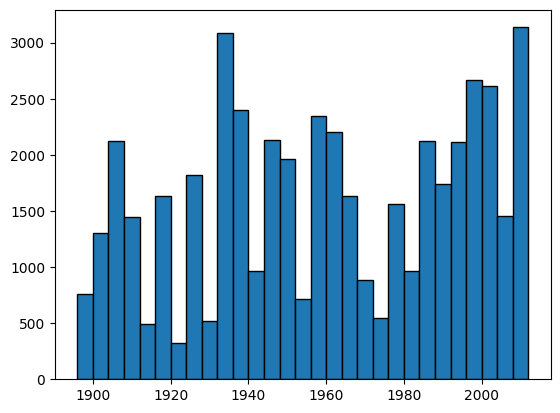

In [236]:
plt.hist(df_trend['year'], bins=range(1896, 2016, 4), edgecolor='black')
plt.show()

### Exercise 5.2

1. Identify an interesting pattern, trend, or relationship in the data. This could relate to countries,
   sports, gender, time periods, medal counts, or any other aspect. Create a single visualization that
   clearly and effectively communicates the insight you found. You are free to choose the type of
   chart, but make sure it suits the message you want to convey.


**Answer: Number of Participant based on our providen dataset**

**My approuch**

- Its shown athletes Ids count per year which indicates causality base don a lot of factors such as WW1, WW2 which could be reason of having not a lo tamount of dataset
- other logical outcome this is visible is ofc the thing that nowadays we have more information of athletes than in past which was more inconsistente and not stable dependent on old methods of data processing and even other reasons compare to nowaday technologies
